In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Load processed monthly data
df = pd.read_csv("data_processed_monthly_sales_by_region.csv")
df.head()

,Order Date,Region,total_sales,total_profit,total_quantity
0,2014-01-31,Central,506.358,20.9235,11
1,2014-01-31,East,199.004,-21.6058,12
2,2014-01-31,South,4378.728,1130.2568,32
3,2014-01-31,West,1158.435,-324.1080,15
4,2014-02-28,Central,439.310,64.0797,13


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Date      191 non-null    object 
 1   Region          191 non-null    object 
 2   total_sales     191 non-null    float64
 3   total_profit    191 non-null    float64
 4   total_quantity  191 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 7.6+ KB


In [3]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      191 non-null    datetime64[ns]
 1   Region          191 non-null    object        
 2   total_sales     191 non-null    float64       
 3   total_profit    191 non-null    float64       
 4   total_quantity  191 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 7.6+ KB


In [5]:
#defining intervention date and group
INTERVENTION_DATE = pd.to_datetime("2016-01-01")
TREATMENT_REGION = "West"

In [7]:
# treatment and control series
# Treatment: West
treatment = (
    df[df["Region"] == TREATMENT_REGION]
    .set_index("Order Date")["total_sales"]
)

# Control: All other regions combined
control = (
    df[df["Region"] != TREATMENT_REGION]
    .groupby("Order Date")["total_sales"]
    .sum()
)

# Combine into a single dataframe
tc = pd.DataFrame({
    "treatment_sales": treatment,
    "control_sales": control
}).dropna()

tc.head()

,treatment_sales,control_sales
Order Date,,
2014-01-31,1158.435,5084.090
2014-02-28,144.128,1695.530
2014-03-31,3920.732,10653.224
2014-04-30,3531.101,4413.736
2014-05-31,1864.382,5048.405


In [8]:
#splitting pre intervention period
pre_tc = tc[tc.index < INTERVENTION_DATE]
len(pre_tc)

24

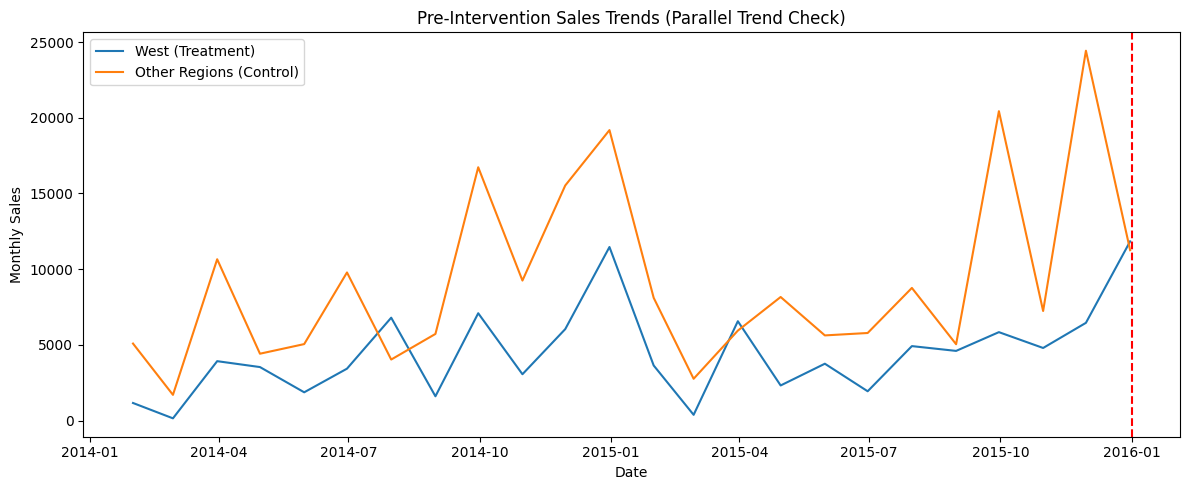

In [9]:
plt.figure(figsize=(12,5))
plt.plot(pre_tc.index, pre_tc["treatment_sales"], label="West (Treatment)")
plt.plot(pre_tc.index, pre_tc["control_sales"], label="Other Regions (Control)")
plt.axvline(INTERVENTION_DATE, color="red", linestyle="--")
plt.title("Pre-Intervention Sales Trends (Parallel Trend Check)")
plt.xlabel("Date")
plt.ylabel("Monthly Sales")
plt.legend()
plt.tight_layout()
plt.show()

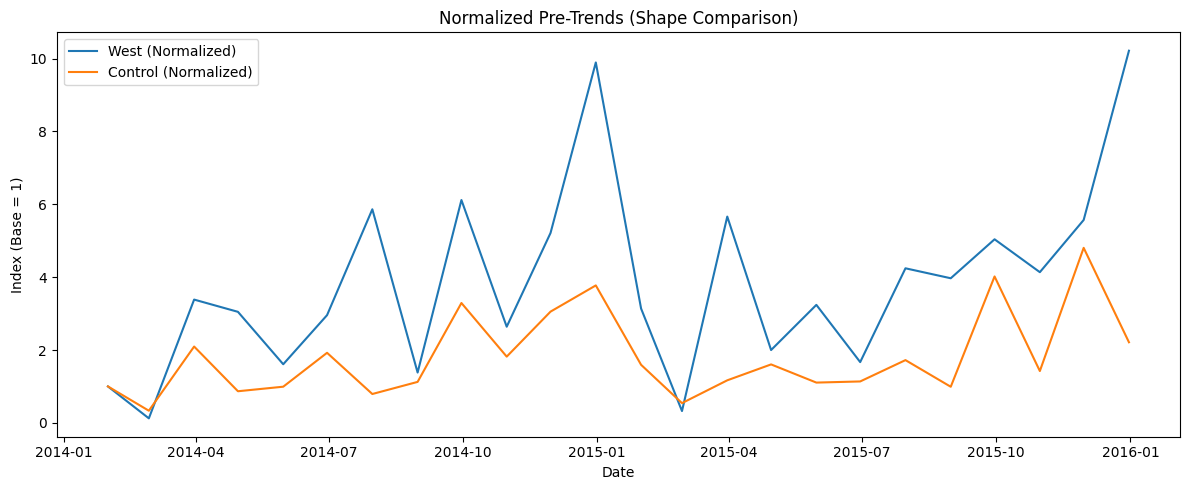

In [12]:
norm = pre_tc.copy()
norm["treatment_norm"] = norm["treatment_sales"] / norm["treatment_sales"].iloc[0]
norm["control_norm"] = norm["control_sales"] / norm["control_sales"].iloc[0]

plt.figure(figsize=(12,5))
plt.plot(norm.index, norm["treatment_norm"], label="West (Normalized)")
plt.plot(norm.index, norm["control_norm"], label="Control (Normalized)")
plt.title("Normalized Pre-Trends (Shape Comparison)")
plt.xlabel("Date")
plt.ylabel("Index (Base = 1)")
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
#correlation check
corr = pre_tc["treatment_sales"].corr(pre_tc["control_sales"])
corr

np.float64(0.6115761349395484)

In [14]:
tc.reset_index().to_csv(
    "treatment_control_timeseries.csv",
    index=False
)